<h1>Introduction</h1>
<p>The metric for the best neighborhood that I have chosen is based on Police Incidents that occurs in the neighborhoods. To be more exact, I chose the number of incidents reported and severity of incidents reported as my metric.</p>

In [2]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np #importing numpy
%matplotlib inline

<h2>Dataset</h2>
<p>The dataset I chose from WPRDC is called "Police Incident Blotter (30 Days)" as this dataset would represent the most recent trend. The link is <a href = "https://data.wprdc.org/dataset/police-incident-blotter">here</a>. The code below uses pandas' read_csv() function to import the data from the official site and I chose to drop a PK, Incident Zone and CCR columns from the dataset. PK is the unique number assigned by the police system, which will have no impact as pandas assigns the index automatically. Incident Zone represents the police zone, a useful data but given the subject of investigation is neighborhoods, the data becomes irrelevant in this case. CCR is the incident number from the police, which once again are irrelevant in this case.</p>

In [3]:
polInc = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b") #Importing data of police incidents in the last 30 days
polInc.drop(["PK", "INCIDENTZONE", "CCR"], axis = 1) #dropping the columns that is police specific such as incident ID

,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,6,2020-10-06T13:09:00,"100 Block Hazlett St Pittsburgh, PA 15214",N,Northview Heights,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,2609.0,1.0,1.0,-80.001648,40.477122
1,27,2020-11-01T12:00:00,"1100 Block Smallman St Pittsburgh, PA 15222",N,Strip District,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,203.0,7.0,6.0,-79.993564,40.446010
2,14,2020-10-15T08:30:00,"2100 Block Brownsville Rd Pittsburgh, PA 15210",N,Carrick,CRIM MISCHIEF,3304 Criminal Mischief.,2902.0,4.0,3.0,-79.986524,40.393200
3,10,2020-10-15T07:30:00,"6600 Block Lyric St Pittsburgh, PA 15206",Y,Lincoln-Lemington-Belmar,HARRASSMENT,2709(a) Harassment.,1203.0,9.0,2.0,-79.905145,40.464503
4,27,2020-10-15T09:20:00,Fort Duquesne Blvd & Fort Duquesne Blvd Ramp P...,N,Central Business District,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,201.0,6.0,6.0,-80.007438,40.442667
...,...,...,...,...,...,...,...,...,...,...,...,...
2983,0,2020-11-02T15:10:00,"3100 Block California Ave Pittsburgh, PA 15212",N,Marshall-Shadeland,99,9993 PFA Service with Weapons Supplement,2715.0,NaN,NaN,0.000000,0.000000
2984,10,2020-11-02T10:38:00,"2400 Block Chauncey Dr Pittsburgh, PA 15219",Y,Bedford Dwellings,SIMPLE ASSAULT,2701 Simple Assault.,509.0,6.0,3.0,-79.974625,40.449841
2985,10,2020-11-03T09:40:00,"10 Block Larimer Ave Pittsburgh, PA 15206",Y,East Liberty,HARRASSMENT,2709(a) Harassment.,1115.0,9.0,2.0,-79.918052,40.462555
2986,0,2020-11-02T06:35:00,"1800 Block Morningside Ave Pittsburgh, PA 15206",N,Stanton Heights,99,9997 Overdose Death,1018.0,7.0,2.0,-79.926825,40.486507


<h2>Number of Incidents</h2>
<p>The following piece of code and graph represents the number of incidents per neighborhood within the last 30 days. As this data was far too large to present on its own, given there are 90 neighborhoods, therefore I decided to cut it down, using a filter. Also, by using the groupby() function, all other columns essentially becomes number of incidents reported. Other groups that appear in this dataset, which should be discounted are outside county and outside city, given the scope is set within Pitt and its Neighborhoods.</p>

In [36]:
polIncDF = pd.DataFrame(polInc) #Making the dataframe
polIncDF = polIncDF.groupby("INCIDENTNEIGHBORHOOD").count()
polIncDF.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county
polIncDF

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,29,29,29,29,29,29,29,29,29,29,22,22,29,29
Allegheny West,7,7,7,7,7,7,7,7,7,7,4,4,7,7
Allentown,35,35,35,35,35,35,35,35,35,35,31,31,35,35
Arlington,21,21,21,21,21,21,21,21,21,21,20,20,21,21
Arlington Heights,6,6,6,6,6,6,6,6,6,6,5,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,22,22,22,22,22,22,22,22,22,22,20,20,22,22
West End,10,10,10,10,10,10,10,10,10,10,9,9,10,10
West Oakland,17,17,17,17,17,17,17,17,17,17,13,13,17,17


In [37]:
query_mask = polIncDF["OFFENSES"] <= 50 #Reducing Sample size with a filter
polIncDF = polIncDF[query_mask]
polIncDF

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,29,29,29,29,29,29,29,29,29,29,22,22,29,29
Allegheny West,7,7,7,7,7,7,7,7,7,7,4,4,7,7
Allentown,35,35,35,35,35,35,35,35,35,35,31,31,35,35
Arlington,21,21,21,21,21,21,21,21,21,21,20,20,21,21
Arlington Heights,6,6,6,6,6,6,6,6,6,6,5,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,22,22,22,22,22,22,22,22,22,22,20,20,22,22
West End,10,10,10,10,10,10,10,10,10,10,9,9,10,10
West Oakland,17,17,17,17,17,17,17,17,17,17,13,13,17,17


<p>The final filter that I chose is any neighborhoods with number of incidents less than 20. This bar chart suggests that New Homestead, St.Clair being the neighborhoods with the least amount of incidents, which is one, reported in the last 30 days. From Swissheim Park to Spring Garden, these neighborhoods only had less than 10 incidents reported in the last 30 days.</p>

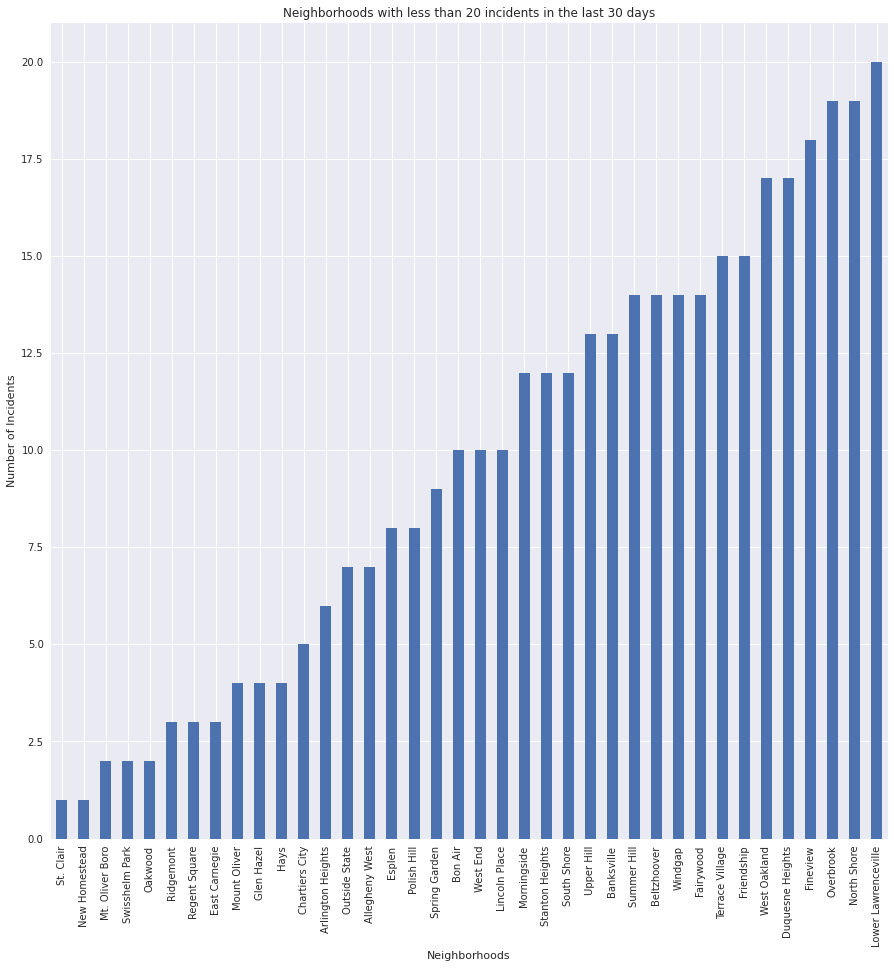

In [38]:
query_mask = polIncDF["OFFENSES"] <= 20 #Reducing Sample size with a filter
polIncDF = polIncDF[query_mask] #Applying filter
polIncBar = polIncDF.sort_values(by = "OFFENSES").plot(kind = "bar",title = "Neighborhoods with less than 20 incidents in the last 30 days", y = "OFFENSES", legend = False, figsize=(15,15)) #No need for legends as there is only 1 variable being measured.
plt.xlabel("Neighborhoods") #Labeling Axis
plt.ylabel("Number of Incidents")
plt.style.use("seaborn")

<h2>Severity</h2>
<p>One other factor that is really important is the severity, this is determined using UCR hierarchy of the incident. UCR Hierarchy represents the most severe incident when more than one incident was reported. I believe it is important to include severity of the incident reported as an area that has frequent hit and run is more dangerous than an area frequent with thievery.</p>
<p>The code below creates a second dataframe that finds the highest UCR hierarchy reported in each neighborhood. The data is then filtered for clarity to display all neighborhoods with a UCR hierarchy less than 27 in the last 30 days, with 27 representing a hit and run and 0 representing stalking. The data of outside county and outside city was discarded as the scope is Pitt and its Neighborhoods.</p>

Text(0, 0.5, 'UCR Hierarchy')

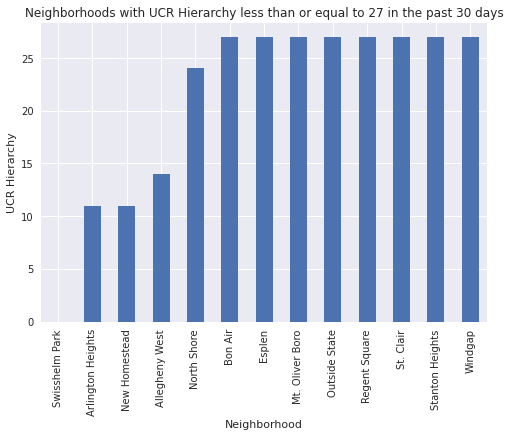

In [39]:
polIncDF2 = pd.DataFrame(polInc) #Making the second dataframe for another standard
polIncDF2 = polIncDF2.groupby("INCIDENTNEIGHBORHOOD")["HIERARCHY"].max() #Finding out the most sever crime based on UCR Hierarchy, but this converts the dataframe to a series
polIncDF2 = pd.DataFrame(polIncDF2) #Turning the series back into a dataframe
polIncDF2.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county
polIncDF2 = polIncDF2[polIncDF2["HIERARCHY"] <= 27] #Filtering out neighborhoods with severe crimes
polIncDF2.sort_values(by = "HIERARCHY").plot(kind = "bar", title = "Neighborhoods with UCR Hierarchy less than or equal to 27 in the past 30 days", legend = False)#Plotting the graph
plt.xlabel("Neighborhood")
plt.ylabel("UCR Hierarchy")

<h2>Merging and Analysis</h2>
<p>Finally, to get a conclusion, it is necessary to combine the two dataframes and merge them. To do that, I will choose the first 10 neighborhoods in both dataframes and merge them.</p>

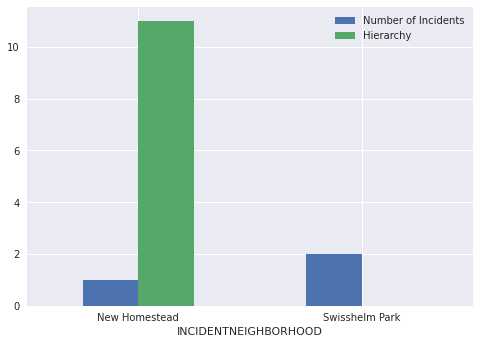

In [49]:
polIncDFFin = pd.merge(polIncDF.sort_values(by = "OFFENSES").head(), polIncDF2.sort_values(by = "HIERARCHY").head(), on = ["INCIDENTNEIGHBORHOOD"]) #Mergin the top ten of each dataframe
polIncDFFin.drop(polIncDFFin.columns.difference(["HIERARCHY_y", "INCIDENTNEIGHBORHOOD", "OFFENSES"]), 1, inplace = True) #Removing all columns except the ones we want
polIncDFFin.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhoods", "HIERARCHY_y":"Hierarchy", "OFFENSES":"Number of Incidents"}, inplace = True) #Changeing column names for presentation
polIncDFFin.plot(kind = "bar", rot = 0) #Creating the bar chart

<h2>Conclusion</h2>
<p>Based on the graph above, it is clear that the only two common groups wihtin the top 10 least incidents reported and lowest hierarchy within the last 30 days is New Homestead and Swisshelm Park, with <strong>Swisshelm Park</strong> taking the win for the best neighborhood based on incident report rate and severity of the incident.</p>